# Preprocessing the Indonesian Hate & Abusive Text 
The original paper [1] preprocess the data in 5 steps:
1. Lower casing all text, 
2. Data cleaning by removing unnecessary characters such as re-tweet symbol (RT), username, URL, and punctuation
3. Normalization using 'Alay' dictionary 
4. Stemming using PySastrawi [2]
5. Stop words removal using list from [3]

In [1]:
!pip install PySastrawi

     |████████████████████████████████| 210 kB 14.2 MB/s eta 0:00:01


In [2]:
import numpy as np
import pandas as pd

!ls '../input'

indonesian-abusive-and-hate-speech-twitter-text  indonesian-stoplist


# Load data

In [3]:
data = pd.read_csv('../input/indonesian-abusive-and-hate-speech-twitter-text/data.csv', encoding='latin-1')

alay_dict = pd.read_csv('../input/indonesian-abusive-and-hate-speech-twitter-text/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

id_stopword_dict = pd.read_csv('../input/indonesian-stoplist/stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

### Text Data

In [4]:
print("Shape: ", data.shape)
data.head(15)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


In [5]:
data.HS.value_counts()

0    7608
1    5561
Name: HS, dtype: int64

In [6]:
data.Abusive.value_counts()

0    8126
1    5043
Name: Abusive, dtype: int64

In [7]:
print("Toxic shape: ", data[(data['HS'] == 1) | (data['Abusive'] == 1)].shape)
print("Non-toxic shape: ", data[(data['HS'] == 0) & (data['Abusive'] == 0)].shape)

Toxic shape:  (7309, 13)
Non-toxic shape:  (5860, 13)


In [8]:
label_col = ['HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 
          'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']
for x in label_col:
    print(x)
    print(data[x].value_counts())

HS_Individual
0    9594
1    3575
Name: HS_Individual, dtype: int64
HS_Group
0    11183
1     1986
Name: HS_Group, dtype: int64
HS_Religion
0    12376
1      793
Name: HS_Religion, dtype: int64
HS_Race
0    12603
1      566
Name: HS_Race, dtype: int64
HS_Physical
0    12846
1      323
Name: HS_Physical, dtype: int64
HS_Gender
0    12863
1      306
Name: HS_Gender, dtype: int64
HS_Other
0    9429
1    3740
Name: HS_Other, dtype: int64
HS_Weak
0    9786
1    3383
Name: HS_Weak, dtype: int64
HS_Moderate
0    11464
1     1705
Name: HS_Moderate, dtype: int64
HS_Strong
0    12696
1      473
Name: HS_Strong, dtype: int64


### Alay Dict

In [9]:
print("Shape: ", alay_dict.shape)
alay_dict.head(15)

Shape:  (15167, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


### ID Stopword

In [10]:
print("Shape: ", id_stopword_dict.shape)
id_stopword_dict.head()


Shape:  (758, 1)


,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


# Preprocess

In [11]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
print("lowercase: ", lowercase("Halooo, duniaa!"))
print("stemming: ", stemming("Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan"))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("aamiin adek abis"))
print("remove_stopword: ", remove_stopword("ada hehe adalah huhu yang hehe"))

remove_nonaplhanumeric:  Halooo duniaa 
lowercase:  halooo, duniaa!
stemming:  ekonomi indonesia sedang dalam tumbuh yang bangga
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  amin adik habis
remove_stopword:  hehe huhu hehe


In [12]:
def preprocess(text):
    text = lowercase(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    text = normalize_alay(text) # 3
    text = stemming(text) # 4
    text = remove_stopword(text) # 5
    return text

In [13]:
data['Tweet'] = data['Tweet'].apply(preprocess)

In [14]:
print("Shape: ", data.shape)
data.head(15)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,1,0,0,0,0,0,1,1,0,0
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0,0,0,0,0,0,0,0,0,0,0,0
3,ku tau mata sipit lihat,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir lihat dongok dungu haha,1,1,0,1,1,0,0,0,0,0,1,0
5,ya bani taplak kawan kawan xf0 x9f x98 x84 xf0...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilih kepala daerah 2018 aman anti h...,0,0,0,0,0,0,0,0,0,0,0,0
7,gue selesai re watch aldnoah zero kampret 2 ka...,0,1,0,0,0,0,0,0,0,0,0,0
8,admin belanja po nak makan ais kepal milo ais ...,0,0,0,0,0,0,0,0,0,0,0,0
9,enak ngewe,0,1,0,0,0,0,0,0,0,0,0,0


# Save Preprocessed Data

In [15]:
# data.to_csv('preprocessed_indonesian_toxic_tweet.csv', index=False)

In [16]:
data.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

# Klasifikasi (Single Label)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df_5k = data[:5000]
df_5k['HS'].value_counts()

0    2864
1    2136
Name: HS, dtype: int64

In [19]:
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_5k['Tweet'])
sequences = tokenizer.texts_to_sequences(df_5k['Tweet'])

# menemukan panjang/banyak kata maksimum dari tweet
max_len = df_5k["Tweet"].apply(lambda x:len(str(x).split())).max()
X = pad_sequences(sequences, maxlen=max_len)
labels = df_5k["HS"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [21]:
model_simpleRNN = Sequential()
model_simpleRNN.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
model_simpleRNN.add(SimpleRNN(32, return_sequences=False))
model_simpleRNN.add(Dense(1, activation='sigmoid'))

model_simpleRNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_simpleRNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 106, 32)           32000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
model_lstm.add(LSTM(32, return_sequences=False))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 106, 32)           32000     
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 40,353
Trainable params: 40,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
history_simpleRNN = model_simpleRNN.fit(X_train, np.array(y_train), epochs=10, batch_size=4, validation_data=(X_test, np.array(y_test)))

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 53s 13ms/sample - loss: 0.5832 - accuracy: 0.6830 - val_loss: 0.4660 - val_accuracy: 0.7830
Epoch 2/10
4000/4000 [==============================] - 50s 13ms/sample - loss: 0.3636 - accuracy: 0.8400 - val_loss: 0.4664 - val_accuracy: 0.7940
Epoch 3/10
4000/4000 [==============================] - 50s 13ms/sample - loss: 0.2458 - accuracy: 0.8992 - val_loss: 0.5499 - val_accuracy: 0.7750
Epoch 4/10
4000/4000 [==============================] - 49s 12ms/sample - loss: 0.1619 - accuracy: 0.9367 - val_loss: 0.6430 - val_accuracy: 0.7760
Epoch 5/10
4000/4000 [==============================] - 50s 12ms/sample - loss: 0.1316 - accuracy: 0.9503 - val_loss: 0.7769 - val_accuracy: 0.7580
Epoch 6/10
4000/4000 [==============================] - 50s 13ms/sample - loss: 0.0860 - accuracy: 0.9707 - val_loss: 0.7911 - val_accuracy: 0.7750
Epoch 7/10
4000/4000 [==============================] - 49s 12ms

In [24]:
history_lstm = model_lstm.fit(X_train, np.array(y_train), epochs=10, batch_size=4, validation_data=(X_test, np.array(y_test)))

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 10s 2ms/sample - loss: 0.5167 - accuracy: 0.7362 - val_loss: 0.4084 - val_accuracy: 0.8170
Epoch 2/10
4000/4000 [==============================] - 6s 2ms/sample - loss: 0.3612 - accuracy: 0.8375 - val_loss: 0.4207 - val_accuracy: 0.8170
Epoch 3/10
4000/4000 [==============================] - 6s 2ms/sample - loss: 0.3169 - accuracy: 0.8648 - val_loss: 0.4357 - val_accuracy: 0.8120
Epoch 4/10
4000/4000 [==============================] - 6s 2ms/sample - loss: 0.2804 - accuracy: 0.8758 - val_loss: 0.4586 - val_accuracy: 0.7910
Epoch 5/10
4000/4000 [==============================] - 7s 2ms/sample - loss: 0.2479 - accuracy: 0.8978 - val_loss: 0.5115 - val_accuracy: 0.8040
Epoch 6/10
4000/4000 [==============================] - 6s 2ms/sample - loss: 0.2145 - accuracy: 0.9118 - val_loss: 0.5764 - val_accuracy: 0.7910
Epoch 7/10
4000/4000 [==============================] - 6s 2ms/sample - los

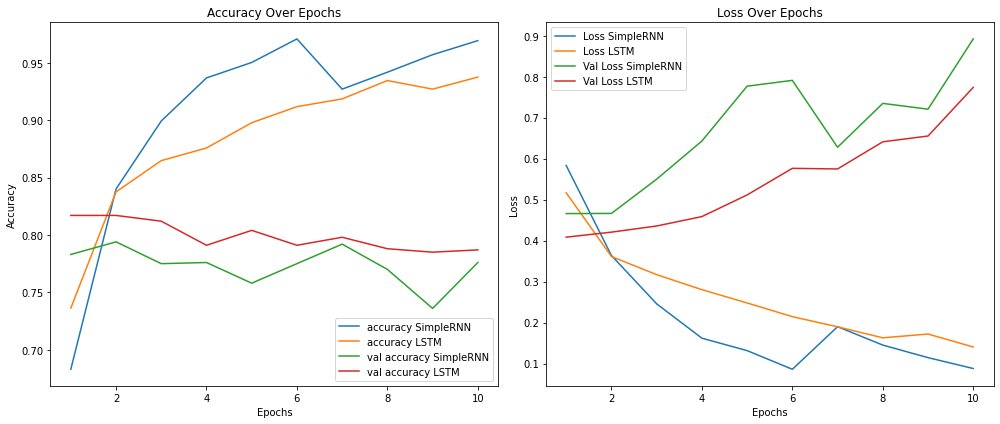

In [33]:
accuracy_simpleRNN = history_simpleRNN.history["accuracy"]
val_accuracy_simpleRNN = history_simpleRNN.history["val_accuracy"]
loss_simpleRNN = history_simpleRNN.history["loss"]
val_loss_simpleRNN = history_simpleRNN.history["val_loss"]

accuracy_lstm = history_lstm.history["accuracy"]
val_accuracy_lstm = history_lstm.history["val_accuracy"]
loss_lstm = history_lstm.history["loss"]
val_loss_lstm = history_lstm.history["val_loss"]

epochs = range(1, len(accuracy_simpleRNN) + 1)

plt.figure(figsize=(14, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy_simpleRNN, label='accuracy SimpleRNN')
plt.plot(epochs, accuracy_lstm, label='accuracy LSTM')
plt.plot(epochs, val_accuracy_simpleRNN, label='val accuracy SimpleRNN')
plt.plot(epochs, val_accuracy_lstm, label='val accuracy LSTM')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss_simpleRNN, label='Loss SimpleRNN')
plt.plot(epochs, loss_lstm, label='Loss LSTM')
plt.plot(epochs, val_loss_simpleRNN, label='Val Loss SimpleRNN')
plt.plot(epochs, val_loss_lstm, label='Val Loss LSTM')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
test_loss_simpleRNN, test_acc_simpleRNN = model_simpleRNN.evaluate(X_test, np.array(y_test))
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(X_test, np.array(y_test))
print(f'Test Accuracy SimpleRNN: {test_acc_simpleRNN}')
print(f'Test Accuracy LSTM: {test_acc_lstm}')

1000/1000 [==============================] - 0s 122us/sample - loss: 0.7739 - accuracy: 0.7870
Test Accuracy SimpleRNN: 0.7760000228881836
Test Accuracy LSTM: 0.7870000004768372


# References

[1] Muhammad Okky Ibrohim and Indra Budi. 2019. Multi-label Hate Speech and Abusive Language Detection in Indonesian Twitter. In ALW3: 3rd Workshop on Abusive Language Online, 46-57.   
[2] https://github.com/har07/PySastrawi
[3] Tala, F. Z. (2003). A Study of Stemming Effects on Information Retrieval in Bahasa Indonesia. M.Sc. Thesis. Master of Logic Project. Institute for Logic, Language and Computation. Universiteit van Amsterdam, The Netherlands.  